In [3]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file, exact_m
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

In [25]:
results = Results(varying_param="max_steps", range= [6, 16, 26, 36, 46, 56, 66, 76, 86, 96])
params = ModelParameters(chi = 36, T_range=(2.15, T_c+0.0003), step=0.0003, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=6: 100%|██████████| 399/399 [00:18<00:00, 21.50it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=16: 100%|██████████| 399/399 [00:58<00:00,  6.86it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=26: 100%|██████████| 399/399 [01:21<00:00,  4.90it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=36: 100%|██████████| 399/399 [01:44<00:00,  3.83it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=46: 100%|██████████| 399/399 [02:22<00:00,  2.80it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=56: 100%|██████████| 399/399 [02:19<00:00,  2.86it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=66: 100%|██████████| 399/399 [02:39<00:00,  2.50it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=76: 100%|██████████| 399/399 [03:06<00:00,  2.14it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=86: 100%|██████████| 399/399 [03:30<00:00,  1.90it/s]


Saving data in folder: '08-05 14:24'
Done 



max_steps=96: 100%|██████████| 399/399 [03:51<00:00,  1.72it/s]


Saving data in folder: '08-05 14:24'
Done 



In [26]:
# Make dir for saving the plots
dir = "08-05 14:24"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

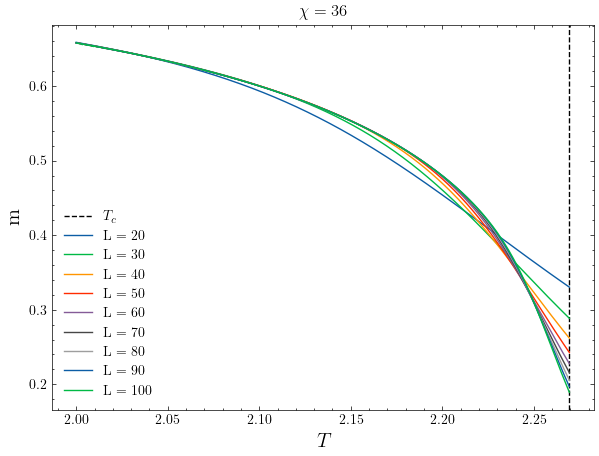

In [29]:
sizes = [16, 26, 36, 46, 56, 66, 76, 86, 96]

plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for size in sizes:
    data = read("08-05 13:53", f"max_steps{size}")
    mags = [np.sqrt(m) for m in compute(Prop.m_fixed, data)]
    plt.plot(data["temperatures"], mags, label = f"L = {size+4}")


plt.legend()
plt.title("$\chi=36$")
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

In [77]:
T_stars = []
for size in sizes:
    data = read("08-05 13:53", f"max_steps{size}")
    mags = [np.sqrt(m) for m in compute(Prop.m_fixed, data)]
    diffs = [ abs(x - z) for x, z in zip(mags[:-1], mags[1:])]
    index = diffs.index(max(diffs))
    T_star = (data["temperatures"][index] + data["temperatures"][index+1])/2 
    T_stars.append(T_star)

In [78]:
T_stars

[2.227250000000143,
 2.2401500000001513,
 2.2467500000001555,
 2.250650000000158,
 2.2533500000001596,
 2.255450000000161,
 2.256950000000162,
 2.2581500000001626,
 2.259050000000163]

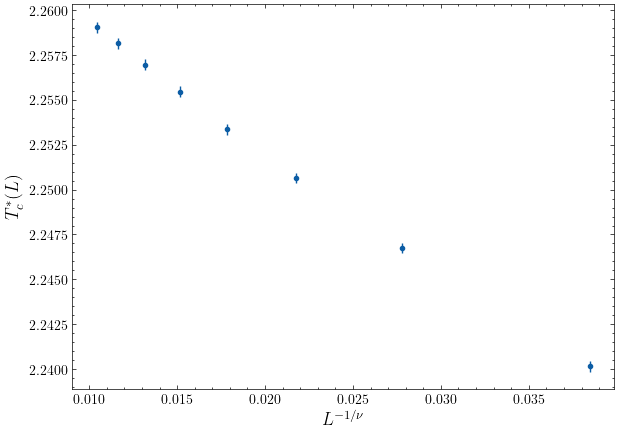

In [79]:
inv_sizes = [1/size for size in sizes]
plt.figure(figsize=(7, 5))
plt.errorbar(inv_sizes[1:], T_stars[1:], yerr=[0.0003 for _ in range(len(T_stars[1:]))], fmt="o", markersize=3)
plt.xlabel(r"$L^{-1/\nu}$", fontsize=13)
plt.ylabel(r"$T_c^*(L)$", fontsize=13)

plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 0.01007911
    reduced chi-square = 0.00335970
    Akaike info crit   = -27.0336398
    Bayesian info crit = -27.8147640
    R-squared          = -492.783690
[[Variables]]
    T:  2.26704695 +/- 4.0992e-05 (0.00%) (init = 0.5)
    a:  0.76651326 +/- 0.00295025 (0.38%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(T, a) = +0.9818


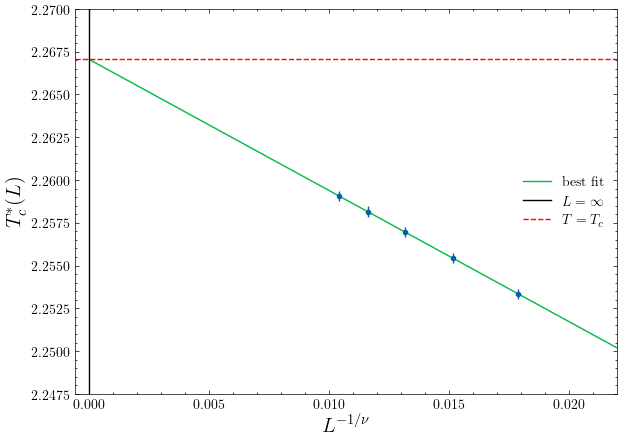

In [83]:
model = Model(lambda x, T, a: T - a*x)

x, y = inv_sizes[4:], T_stars[4:]

params = model.make_params(a=0.5, T=0.5)
result = model.fit(y, params, x=x, weights=1/0.0003)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.errorbar(x, y, yerr=[0.0003 for _ in range(len(T_stars[4:]))], fmt="o", markersize=3)
x = [val for val in np.arange(0, 0.025, 0.0001)]
y = [result.params["T"] - result.params["a"]*val for val in x]
plt.plot(x, y, '-', label='best fit')
plt.xlabel(r"$L^{-1/\nu}$", fontsize=15)
plt.xlim(-0.0006, 0.022)
plt.ylim(2.2475, 2.27)
plt.axvline(0, color="k", label = r"$L = \infty$")
plt.axhline(result.params["T"].value, color="r", linestyle="dashed",label = r"$T = T_c$")
plt.ylabel(r"$T_c^*(L)$", fontsize=15)
plt.legend()
plt.show()

In [84]:
print(f"Obtained T_c: {result.params['T'].value} +/- {result.params['T'].stderr}")
print(f"exact T_c: {T_c}")

Obtained T_c: 2.2670469465380356 +/- 4.099232163683546e-05
exact T_c: 2.269185314213022


In [2]:
chis = [4, 8, 12, 16, 24]
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(var_range=(T_c, 2.285), step=0.00005, tol=1e-8, max_steps=int(10e9), use_prev=True)
result.get(params)

chi=4: 100%|██████████| 317/317 [06:27<00:00,  1.22s/it]


Saving data in folder: '15-06 00:44'
Done 



chi=8: 100%|██████████| 317/317 [06:50<00:00,  1.29s/it]


Saving data in folder: '15-06 00:44'
Done 



chi=12: 100%|██████████| 317/317 [12:48<00:00,  2.43s/it] 


Saving data in folder: '15-06 00:44'
Done 



chi=16: 100%|██████████| 317/317 [17:31<00:00,  3.32s/it]  


Saving data in folder: '15-06 00:44'
Done 



chi=24: 100%|██████████| 317/317 [25:36<00:00,  4.85s/it]  


Saving data in folder: '15-06 00:44'
Done 



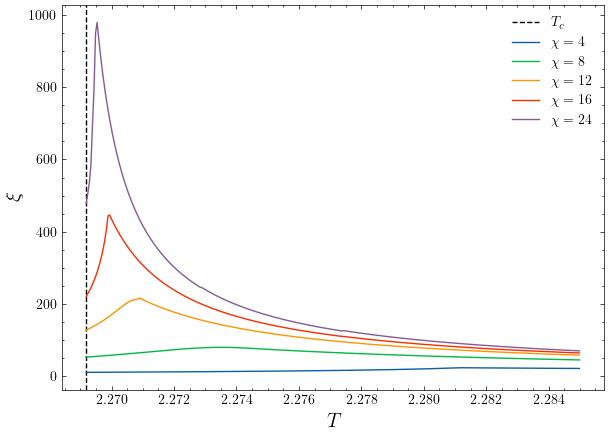

In [3]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for chi in chis:
    data = read('15-06 00:44',f"chi{chi}")
    corrs = compute(Prop.xi, data)
    plt.plot(data["temperatures"], corrs, label = f"$\chi = {chi}$")

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
plt.show()

In [4]:
coords = []
for chi in [4, 8, 12, 16, 24]: 
    data = read("14-06 17:40", f"chi{chi}")
    corrs = compute(Prop.xi, data)
    max_index = corrs.index(max(corrs))
    T_star = data["temperatures"][max_index]
    coords.append((data["temperatures"][max_index], corrs[max_index]))

In [5]:
T_stars, corrs = list(zip(*coords))

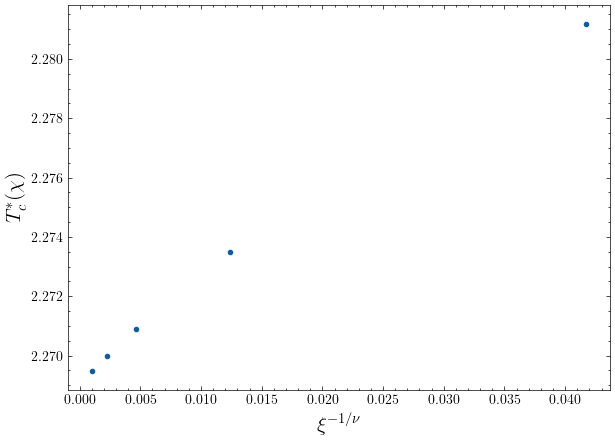

In [48]:
x = [1/corr for corr in corrs]

plt.figure(figsize=(7, 5))
plt.errorbar(x, T_stars, yerr = [0.00005 for _ in range(len(T_stars))], fmt="o", markersize=3)
plt.ylabel(r"$T_c^*(\chi)$", fontsize=15)
plt.xlabel(r"$\xi^{-1/\nu}$", fontsize=15)
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 4
    # variables        = 2
    chi-square         = 5.69277701
    reduced chi-square = 2.84638850
    Akaike info crit   = 5.41161528
    Bayesian info crit = 4.18420400
    R-squared          = -598765.974
[[Variables]]
    T:  2.26918539 +/- 6.4346e-05 (0.00%) (init = 0.5)
    a: -0.34840111 +/- 0.00953869 (2.74%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(T, a) = +0.7552


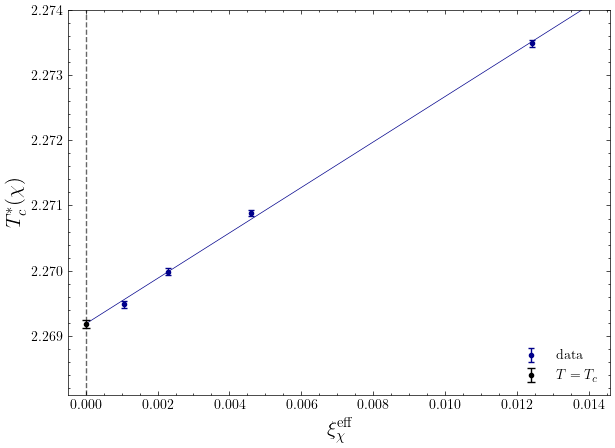

In [173]:

x = [1/corr for corr in corrs]

model = Model(lambda x, T, a: T - a*x)

y = T_stars[1:]
x = x[1:]

params = model.make_params(a=0.5, T=0.5)
result = model.fit(y, params, x=x, weights=1/0.00005)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.errorbar(x, y, yerr=[0.00005 for _ in range(len(T_stars[4:]))], fmt="o", markersize=3, capsize=2.5, color="darkblue", label = "data")
x = [val for val in np.arange(0, 0.014, 0.0001)]
y = [result.params["T"] - result.params["a"]*val for val in x]
plt.plot(x, y, '-', color = "darkblue", linewidth=0.5)
plt.xlabel(r"$(\xi_{\chi}^{\text{eff}})^{-1/ \nu}$", fontsize=15)
plt.axvline(x=0, color="k", linestyle = "dashed", alpha = 0.6)
plt.ylabel(r"$T_c^*(\chi)$", fontsize=15)
plt.ylim(2.2681, 2.274)
plt.xlim(-0.0005)
plt.errorbar(0, result.params["T"].value, yerr=result.params["T"].stderr, fmt="o", markersize=3, capsize=3, color="k", label = "$T = T_c$")

"""
y_upper = [-(result.params["a"].value + result.params["a"].stderr) *e + result.params["b"] for e in x]
y_lower = [-(result.params["a"].value - result.params["a"].stderr) *e + result.params["b"] for e in x]

plt.fill_between(x, y_upper, y_lower, alpha = 0.18)
"""

plt.legend()
plt.show()


In [154]:
print(f"Obtained T_c: {result.params['T'].value} +/- {result.params['T'].stderr}")
print(f"exact T_c: {T_c}")

Obtained T_c: 2.2691853935979363 +/- 6.434616974362302e-05
exact T_c: 2.269185314213022
